imports:

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from exercises_01_module import fit_and_eval

### 0.

load dataset and examine it

In [54]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


info to see missing values and types

In [55]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    str    
 8   name          398 non-null    str    
dtypes: float64(4), int64(3), str(2)
memory usage: 28.1 KB


drop missing (due to there not being many na) and describe to examine further

In [56]:
df.dropna(axis=0, inplace=True)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


hist plots to see distributions

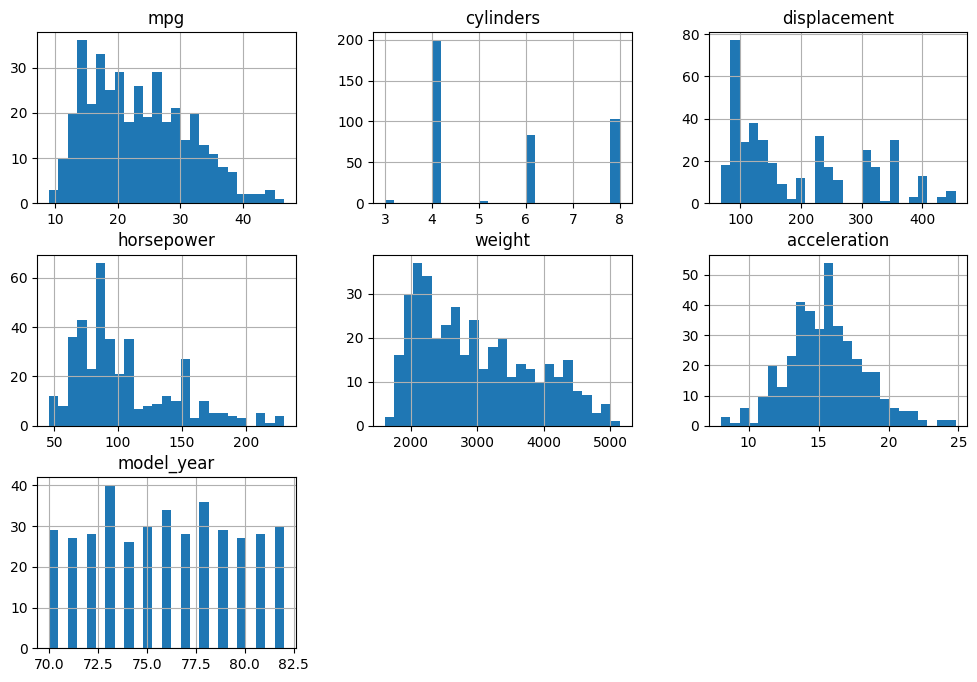

In [57]:
df.hist(bins=25, figsize=(12, 8), grid=True)
plt.show()

pair plots to see how the features move togeather

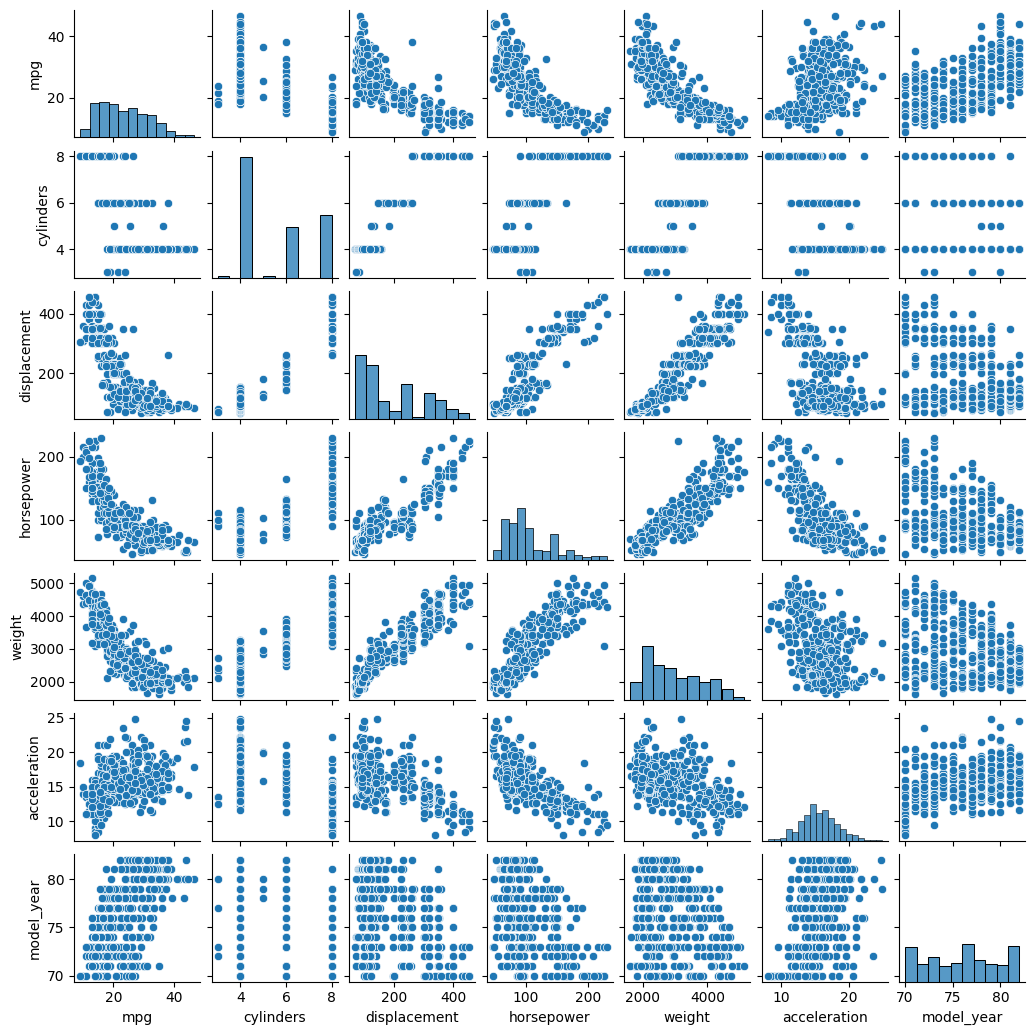

In [58]:
sns.pairplot(data=df, height=1.5)
plt.show()

check what features to remove

In [59]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


drop name since it is compleately unnessecery, I will keep origin due to the different laws design philosophies during that time period.

In [60]:
df_one_hot = df.drop(columns=['name'])

df_one_hot = pd.get_dummies(df_one_hot, columns=['origin'],).drop(['origin_usa'], axis=1).astype(int)
df_one_hot.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan
0,18,8,307,130,3504,12,70,0,0
1,15,8,350,165,3693,11,70,0,0
2,18,8,318,150,3436,11,70,0,0
3,16,8,304,150,3433,12,70,0,0
4,17,8,302,140,3449,10,70,0,0


add one hot encoding so that the models can interprate the categorical data

In [61]:
X = df_one_hot.drop(columns=['mpg'])
Y = df['mpg']
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan
0,8,307,130,3504,12,70,0,0
1,8,350,165,3693,11,70,0,0
2,8,318,150,3436,11,70,0,0
3,8,304,150,3433,12,70,0,0
4,8,302,140,3449,10,70,0,0
...,...,...,...,...,...,...,...,...
393,4,140,86,2790,15,82,0,0
394,4,97,52,2130,24,82,1,0
395,4,135,84,2295,11,82,0,0
396,4,120,79,2625,18,82,0,0


In [62]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

### 1, 2.

split into training data and test data

In [63]:
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((313, 8), (79, 8), (313,), (79,))

create normal linear regression model

In [64]:
lin_reg_SVD = sk.linear_model.LinearRegression()

models_df = pd.DataFrame.from_dict(fit_and_eval(X_train, X_test, Y_train, Y_test, lin_reg_SVD), orient='index', columns=['lin_reg_SVD'])


create normal linear regression model with standardized features

In [65]:
lin_reg_SVD_scaled = sk.linear_model.LinearRegression()
scaler = sk.preprocessing.StandardScaler()

models_df['lin_reg_SVD_scaled'] = pd.Series(fit_and_eval(scaler.fit_transform(X_train), scaler.transform(X_test), Y_train, Y_test, lin_reg_SVD_scaled))


create stochastic gradient descent regression model

In [66]:
lin_reg_SGD = sk.linear_model.SGDRegressor()

models_df['lin_reg_SGD'] = pd.Series(fit_and_eval(scaler.fit_transform(X_train), scaler.transform(X_test), Y_train, Y_test, lin_reg_SGD))


create polynomial regression of degree 1

In [67]:
poly_reg_deg_1 = sk.linear_model.LinearRegression()
poly = sk.preprocessing.PolynomialFeatures(degree=1)

models_df['poly_reg_deg_1'] = pd.Series(fit_and_eval(poly.fit_transform(X_train), poly.transform(X_test), Y_train, Y_test, poly_reg_deg_1))


create polynomial regression of degree 2

In [68]:
poly_reg_deg_2 = sk.linear_model.LinearRegression()
poly = sk.preprocessing.PolynomialFeatures(degree=2)

models_df['poly_reg_deg_2'] = pd.Series(fit_and_eval(poly.fit_transform(X_train), poly.transform(X_test), Y_train, Y_test, poly_reg_deg_2))


create polynomial regression of degree 3

In [69]:
poly_reg_deg_3 = sk.linear_model.LinearRegression()
poly = sk.preprocessing.PolynomialFeatures(degree=3)

models_df['poly_reg_deg_3'] = pd.Series(fit_and_eval(poly.fit_transform(X_train), poly.transform(X_test), Y_train, Y_test, poly_reg_deg_3))

### 3.

compare all models

In [70]:
models_df

,lin_reg_SVD,lin_reg_SVD_scaled,lin_reg_SGD,poly_reg_deg_1,poly_reg_deg_2,poly_reg_deg_3
mae,2.460737,2.460737,2.510488,2.460737,2.014510,4.041050
mse,10.615269,10.615269,11.150184,10.615269,7.690401,72.977438
rmse,3.258108,3.258108,3.339189,3.258108,2.773157,8.542683
